<a href="https://colab.research.google.com/github/VishnuK-0206/AIML-IIITH/blob/main/AIML_Project_Module_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Project for Module 4: Perceptron and Gradient Descent

NOTE: YOU NEED TO WRITE CODE IN CELLS THAT SPECIFICALLY MENTION TASK-1, TASK-2, etc.

WRITE ANY OBSERVATION(S), IF REQUIRED BY THE TASK, IN A SEPARATE CELL AT THE BOTTOM OF THE NOTEBOOK.  

---

# Notebook Imports and Packages

In [46]:
import matplotlib.pyplot as plt
import numpy as np

from mpl_toolkits.mplot3d.axes3d import Axes3D
from matplotlib import cm # color map

from sympy import symbols, diff
from math import log

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

%matplotlib inline

# Example 1 - A simple cost function

## $$f(x) = x^2 + x + 1$$

In [47]:
def f(x):
    return x ** 2 + x + 1

In [48]:
# Make Data
x_1 = np.linspace(start=-3, stop=3, num=500)

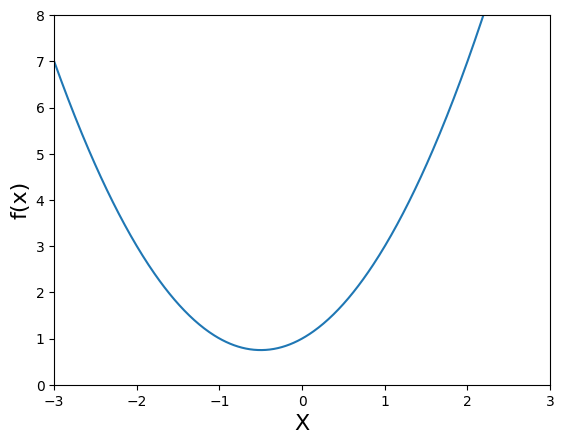

In [49]:
# Plot
plt.xlim(-3, 3)
plt.ylim(0, 8)
plt.xlabel('X', fontsize=16)
plt.ylabel('f(x)', fontsize=16)
plt.plot(x_1, f(x_1))
plt.show()

## Slope & Derivatives

Creating a function for the derivative of $f(x)$ called df(x)

In [50]:
def df(x):
    return 2 * x + 1

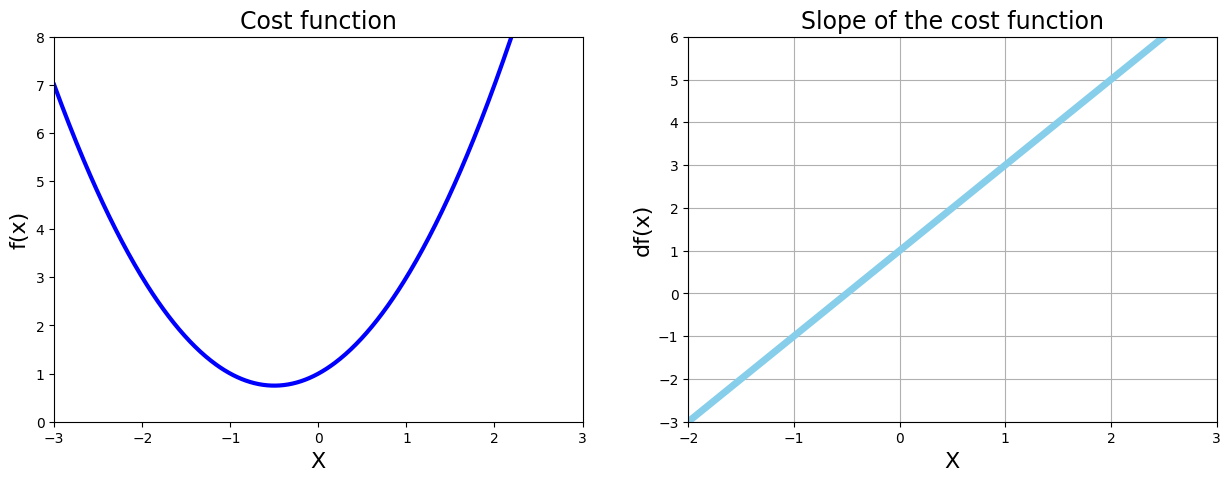

In [51]:
# Plot function and derivative side by side
plt.figure(figsize=[15, 5])

# 1 Chart: Cost function
plt.subplot(1, 2, 1)

plt.xlim(-3, 3)
plt.ylim(0, 8)

plt.title('Cost function', fontsize=17)
plt.xlabel('X', fontsize=16)
plt.ylabel('f(x)', fontsize=16)

plt.plot(x_1, f(x_1), color='blue', linewidth=3)

# 2 Chart: Derivative
plt.subplot(1, 2, 2)

plt.title('Slope of the cost function', fontsize=17)
plt.xlabel('X', fontsize=16)
plt.ylabel('df(x)', fontsize=16)
plt.grid()
plt.xlim(-2, 3)
plt.ylim(-3, 6)

plt.plot(x_1, df(x_1), color='skyblue', linewidth=5)

plt.show()

## Gradient Descent

In [52]:
##########################
##########################

## TASK-1 : Complete the lines of code wherever marked as [REQUIRED] in this cell.

##########################
##########################

# Gradient Descent
new_x = 3
previous_x = 0
step_multiplier = 0.1
precision = 0.00001

x_list = [new_x]
slope_list = [df(new_x)]

for n in range(500):
    previous_x = new_x
    gradient = df(previous_x) ## [REQUIRED]
    new_x = previous_x - step_multiplier * gradient ## [REQUIRED]

    step_size = abs(new_x - previous_x)
    # print(step_size)

    x_list.append(new_x)
    slope_list.append(df(new_x)) ## [REQUIRED])

    if step_size < precision:
        print('Loop ran this many times:', n)
        break

print('Local minimum occurs at:', new_x)
print('Slope or df(x) value at this point is:', df(new_x))
print('f(x) value or cost at this point is:', f(new_x))

Loop ran this many times: 50
Local minimum occurs at: -0.49996003706460423
Slope or df(x) value at this point is: 7.992587079153068e-05
f(x) value or cost at this point is: 0.7500000015970362


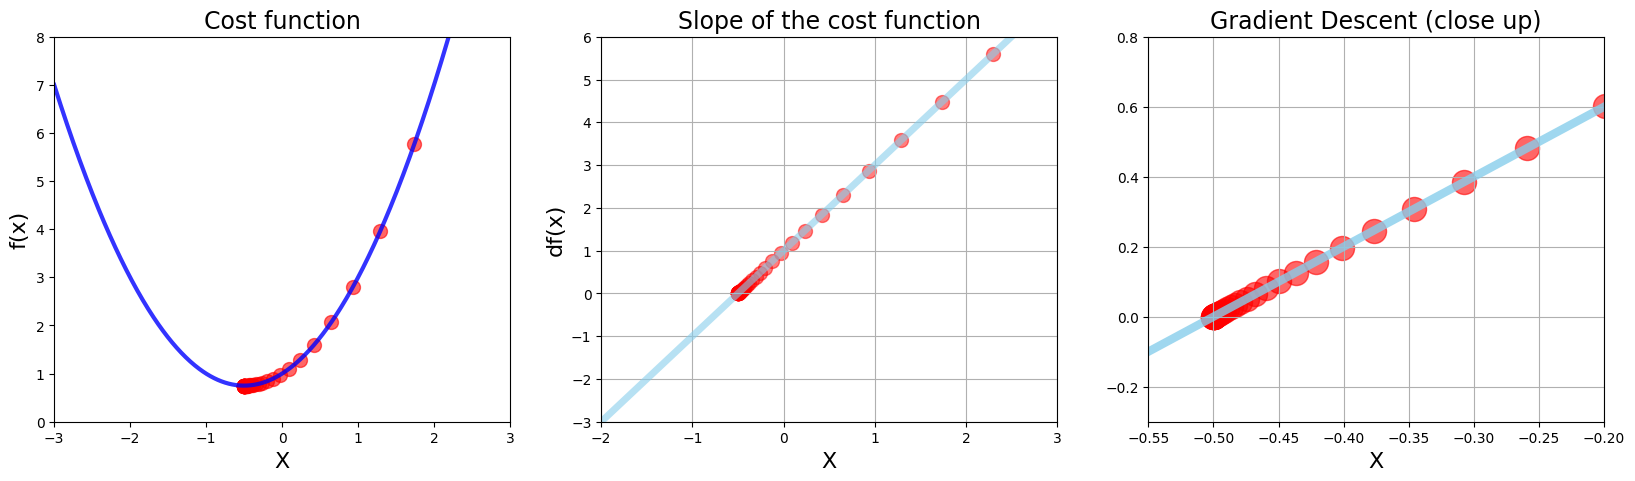

In [53]:
# Superimpose the gradient descent calculations on plot

plt.figure(figsize=[20, 5])

# 1 Chart: Cost function
plt.subplot(1, 3, 1)

plt.xlim(-3, 3)
plt.ylim(0, 8)

plt.title('Cost function', fontsize=17)
plt.xlabel('X', fontsize=16)
plt.ylabel('f(x)', fontsize=16)

plt.plot(x_1, f(x_1), color='blue', linewidth=3, alpha=0.8)

values = np.array(x_list)
plt.scatter(x_list, f(values), color='red', s=100, alpha=0.6)

# 2 Chart: Derivative
plt.subplot(1, 3, 2)

plt.title('Slope of the cost function', fontsize=17)
plt.xlabel('X', fontsize=16)
plt.ylabel('df(x)', fontsize=16)
plt.grid()
plt.xlim(-2, 3)
plt.ylim(-3, 6)

plt.plot(x_1, df(x_1), color='skyblue', linewidth=5, alpha=0.6)
plt.scatter(x_list, slope_list, color='red', s=100, alpha=0.5)

# 3 Chart: Derivative (Close Up)
plt.subplot(1, 3, 3)

plt.title('Gradient Descent (close up)', fontsize=17)
plt.xlabel('X', fontsize=16)
plt.grid()
plt.xlim(-0.55, -0.2)
plt.ylim(-0.3, 0.8)

plt.plot(x_1, df(x_1), color='skyblue', linewidth=6, alpha=0.8)
plt.scatter(x_list, slope_list, color='red', s=300, alpha=0.6)


plt.show()

# Example 2 - Multiple Minima vs Initial Guess & Advanced Functions

## $$g(x) = x^4 - 4x^2 + 5$$

In [54]:
##########################
##########################

## TASK-2 : Complete the lines of code wherever marked as [REQUIRED] in this cell.

##########################
##########################

# Make some data
x_2 = np.linspace(-2, 2, 1000)

def g(x):
    return x**4 - 4*x**2 + 5   ## [REQUIRED]

def dg(x):
    return 4*x**3 - 8*x ## [REQUIRED]

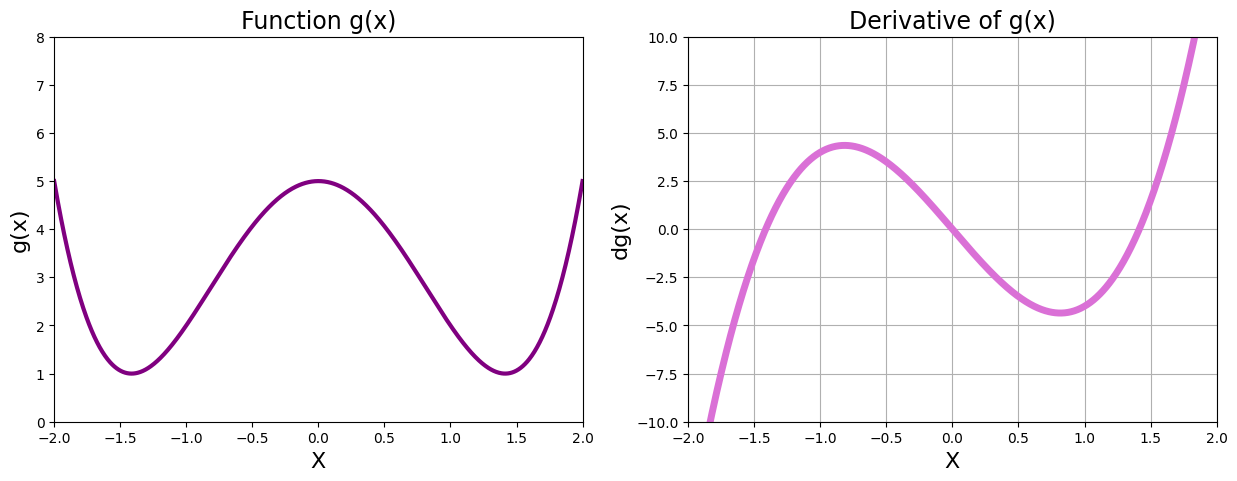

In [55]:
## TASK-3 : Plot function and derivative side by side like has been done earlier

plt.figure(figsize=[15, 5])

# 1 Chart: Function g(x)
plt.subplot(1, 2, 1)

plt.xlim(-2, 2)
plt.ylim(0, 8)

plt.title('Function g(x)', fontsize=17)
plt.xlabel('X', fontsize=16)
plt.ylabel('g(x)', fontsize=16)

plt.plot(x_2, g(x_2), color='purple', linewidth=3)

# 2 Chart: Derivative dg(x)
plt.subplot(1, 2, 2)

plt.title('Derivative of g(x)', fontsize=17)
plt.xlabel('X', fontsize=16)
plt.ylabel('dg(x)', fontsize=16)
plt.grid()
plt.xlim(-2, 2)
plt.ylim(-10, 10)

plt.plot(x_2, dg(x_2), color='orchid', linewidth=5)

plt.show()


## Gradient Descent

In [56]:
def gradient_descent(derivative_func, initial_guess, multiplier=0.02, precision=0.001,
                    max_iter=300):
    new_x = initial_guess
    x_list = [new_x]
    slope_list = [derivative_func(new_x)]

    for n in range(max_iter):
        previous_x = new_x
        gradient = derivative_func(previous_x)
        new_x = previous_x - multiplier * gradient

        step_size = abs(new_x - previous_x)
        x_list.append(new_x)
        slope_list.append(derivative_func(new_x))

        if step_size < precision:
            break
    return new_x, x_list, slope_list

In [57]:
local_min, list_x, deriv_list = gradient_descent(dg, 0.5, 0.02, 0.001)
print('Local min occurs at:', local_min)
print('Number of steps:', len(list_x))

Local min occurs at: 1.4122375085019094
Number of steps: 23


In [58]:
local_min, list_x, deriv_list = gradient_descent(derivative_func=dg, initial_guess= -0.5,
                                                 multiplier=0.01, precision=0.0001)
print('Local min occurs at:', local_min)
print('Number of steps:', len(list_x))

Local min occurs at: -1.4137636556157256
Number of steps: 56


In [59]:
local_min, list_x, deriv_list = gradient_descent(derivative_func=dg, initial_guess= -0.1)
print('Local min occurs at:', local_min)
print('Number of steps:', len(list_x))

Local min occurs at: -1.4120887490901561
Number of steps: 34


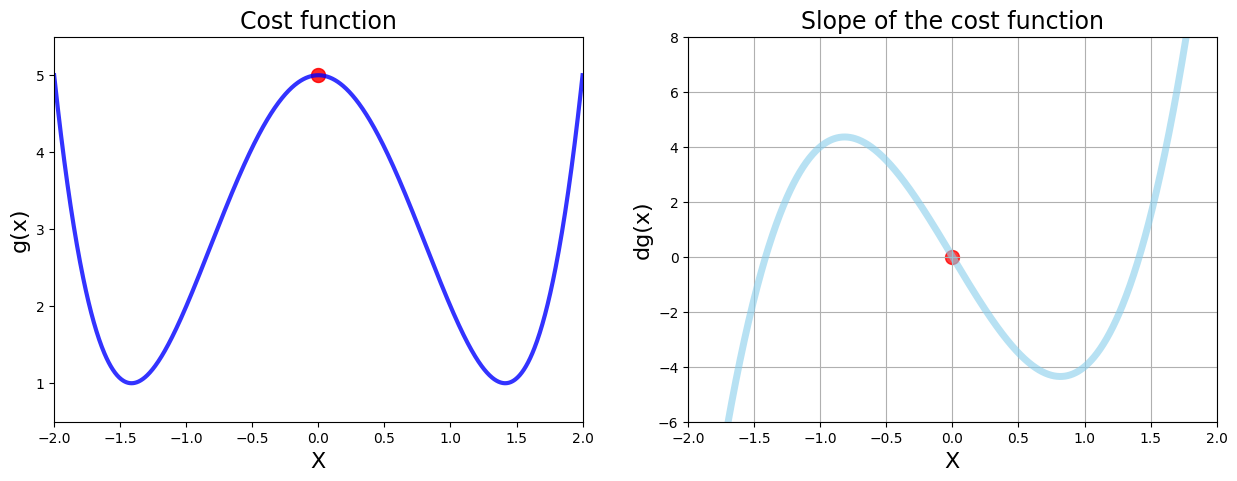

In [60]:
# Calling gradient descent function
local_min, list_x, deriv_list = gradient_descent(derivative_func=dg, initial_guess= 0)

# Plot function and derivative and scatter plot side by side

plt.figure(figsize=[15, 5])

# 1 Chart: Cost function
plt.subplot(1, 2, 1)

plt.xlim(-2, 2)
plt.ylim(0.5, 5.5)

plt.title('Cost function', fontsize=17)
plt.xlabel('X', fontsize=16)
plt.ylabel('g(x)', fontsize=16)

plt.plot(x_2, g(x_2), color='blue', linewidth=3, alpha=0.8)
plt.scatter(list_x, g(np.array(list_x)), color='red', s=100, alpha=0.6)

# 2 Chart: Derivative
plt.subplot(1, 2, 2)

plt.title('Slope of the cost function', fontsize=17)
plt.xlabel('X', fontsize=16)
plt.ylabel('dg(x)', fontsize=16)
plt.grid()
plt.xlim(-2, 2)
plt.ylim(-6, 8)

plt.plot(x_2, dg(x_2), color='skyblue', linewidth=5, alpha=0.6)
plt.scatter(list_x, deriv_list, color='red', s=100, alpha=0.5)

plt.show()

# Example 3 - Divergence and Overflow

## $$h(x) = x^5 - 2x^4 + 2$$

Local min for h(x) occurs at: 1.5985746230243199
Number of steps: 35


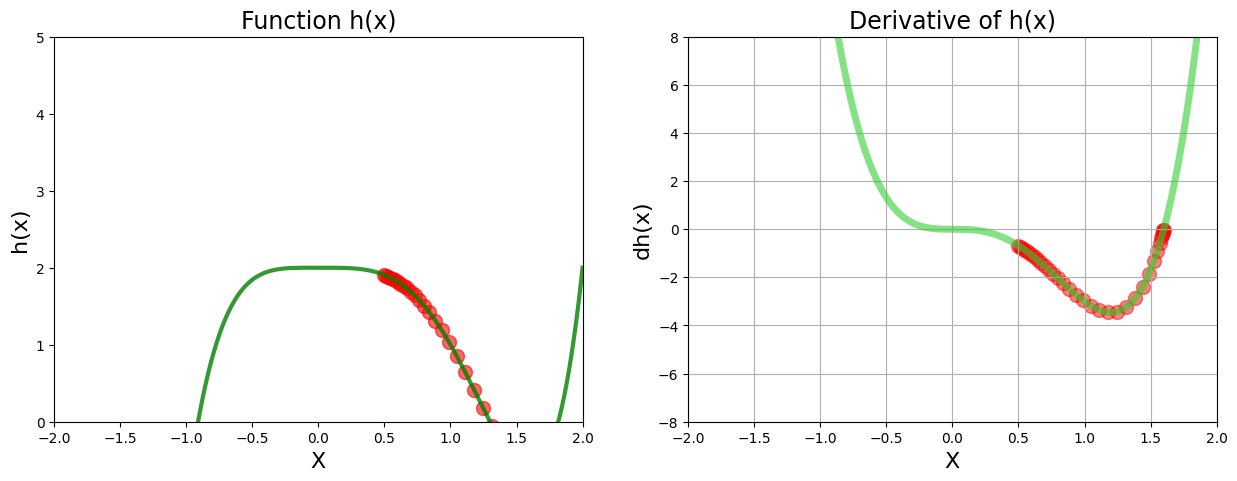

In [61]:
## TASK-4 : Code the same things as they were done for the first two examples

# Define the new function h(x) and its derivative dh(x)
def h(x):
    return x**5 - 2*x**4 + 2

def dh(x):
    return 5*x**4 - 8*x**3

# Gradient Descent for h(x)
local_min_h, list_x_h, deriv_list_h = gradient_descent(derivative_func=dh, initial_guess=0.5, multiplier=0.02, precision=0.001)

# Print results
print('Local min for h(x) occurs at:', local_min_h)
print('Number of steps:', len(list_x_h))

# Plot function and derivative and scatter plot side by side
plt.figure(figsize=[15, 5])

# 1 Chart: Function h(x)
plt.subplot(1, 2, 1)

plt.xlim(-2, 2)
plt.ylim(0, 5)

plt.title('Function h(x)', fontsize=17)
plt.xlabel('X', fontsize=16)
plt.ylabel('h(x)', fontsize=16)

x_h = np.linspace(-2, 2, 1000)
plt.plot(x_h, h(x_h), color='green', linewidth=3, alpha=0.8)
plt.scatter(list_x_h, h(np.array(list_x_h)), color='red', s=100, alpha=0.6)

# 2 Chart: Derivative dh(x)
plt.subplot(1, 2, 2)

plt.title('Derivative of h(x)', fontsize=17)
plt.xlabel('X', fontsize=16)
plt.ylabel('dh(x)', fontsize=16)
plt.grid()
plt.xlim(-2, 2)
plt.ylim(-8, 8)

plt.plot(x_h, dh(x_h), color='limegreen', linewidth=5, alpha=0.6)
plt.scatter(list_x_h, deriv_list_h, color='red', s=100, alpha=0.5)

plt.show()


# The Learning Rate

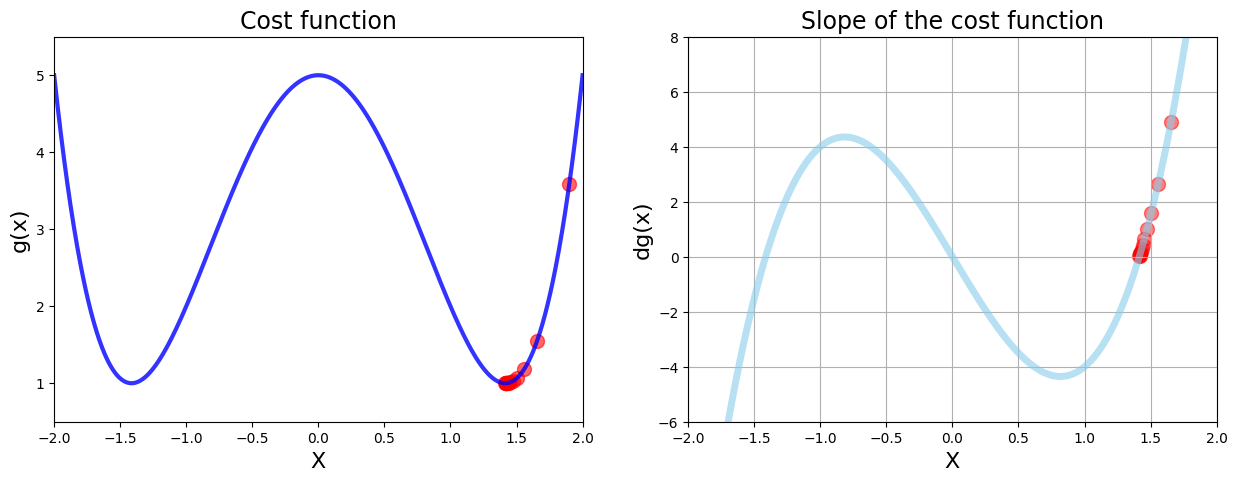

Number of steps is:  14


In [62]:
# Calling gradient descent function
local_min, list_x, deriv_list = gradient_descent(derivative_func=dg, initial_guess= 1.9,
                                                multiplier=0.02, max_iter=500)

# Plot function and derivative and scatter plot side by side

plt.figure(figsize=[15, 5])

# 1 Chart: Cost function
plt.subplot(1, 2, 1)

plt.xlim(-2, 2)
plt.ylim(0.5, 5.5)

plt.title('Cost function', fontsize=17)
plt.xlabel('X', fontsize=16)
plt.ylabel('g(x)', fontsize=16)

plt.plot(x_2, g(x_2), color='blue', linewidth=3, alpha=0.8)
plt.scatter(list_x, g(np.array(list_x)), color='red', s=100, alpha=0.6)

# 2 Chart: Derivative
plt.subplot(1, 2, 2)

plt.title('Slope of the cost function', fontsize=17)
plt.xlabel('X', fontsize=16)
plt.ylabel('dg(x)', fontsize=16)
plt.grid()
plt.xlim(-2, 2)
plt.ylim(-6, 8)

plt.plot(x_2, dg(x_2), color='skyblue', linewidth=5, alpha=0.6)
plt.scatter(list_x, deriv_list, color='red', s=100, alpha=0.5)

plt.show()

print('Number of steps is: ', len(list_x))

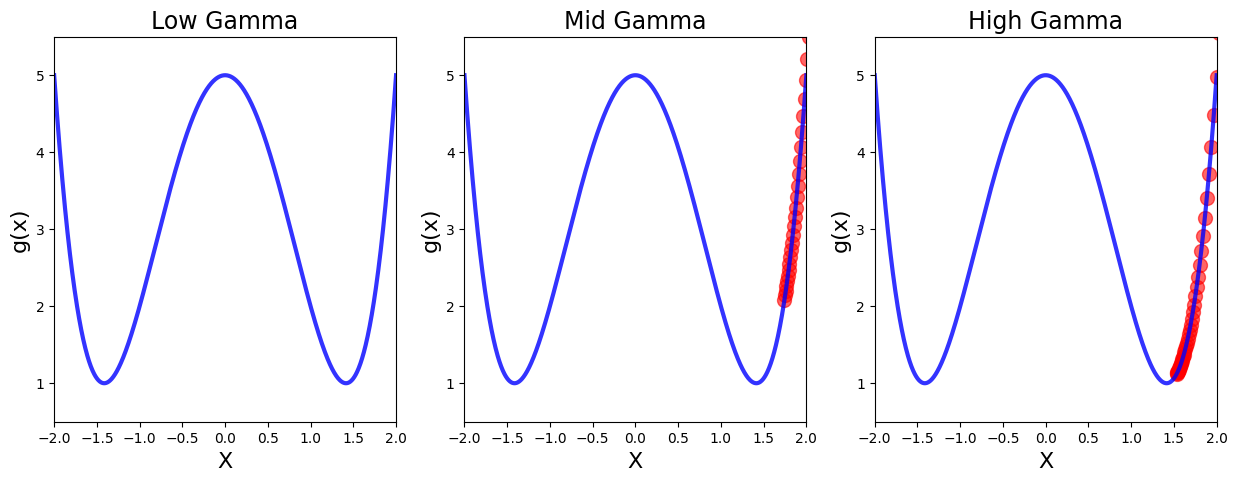

In [63]:
# TASK-5: Run gradient descent 3 times
# First time (already done above)
local_min_low_gamma, list_x_low_gamma, deriv_list_low_gamma = gradient_descent(derivative_func=dg, initial_guess=3,
                                                                               multiplier=0.0005, precision=0.0001, max_iter=n)

# Second time (mid_gamma)
local_min_mid_gamma, list_x_mid_gamma, deriv_list_mid_gamma = gradient_descent(derivative_func=dg, initial_guess=3,
                                                                               multiplier=0.001, precision=0.0001, max_iter=n)

# Third time (high_gamma)
local_min_high_gamma, list_x_high_gamma, deriv_list_high_gamma = gradient_descent(derivative_func=dg, initial_guess=3,
                                                                                  multiplier=0.002, precision=0.0001, max_iter=n)

# TASK-6: Plot two more learning rates: mid_gamma (0.001) and high_gamma (0.002)
plt.figure(figsize=[15, 5])

# 1 Chart: Low Gamma
plt.subplot(1, 3, 1)

plt.xlim(-2, 2)
plt.ylim(0.5, 5.5)

plt.title('Low Gamma', fontsize=17)
plt.xlabel('X', fontsize=16)
plt.ylabel('g(x)', fontsize=16)

plt.plot(x_2, g(x_2), color='blue', linewidth=3, alpha=0.8)
plt.scatter(list_x_low_gamma, g(np.array(list_x_low_gamma)), color='red', s=100, alpha=0.6)

# 2 Chart: Mid Gamma
plt.subplot(1, 3, 2)

plt.xlim(-2, 2)
plt.ylim(0.5, 5.5)

plt.title('Mid Gamma', fontsize=17)
plt.xlabel('X', fontsize=16)
plt.ylabel('g(x)', fontsize=16)

plt.plot(x_2, g(x_2), color='blue', linewidth=3, alpha=0.8)
plt.scatter(list_x_mid_gamma, g(np.array(list_x_mid_gamma)), color='red', s=100, alpha=0.6)

# 3 Chart: High Gamma
plt.subplot(1, 3, 3)

plt.xlim(-2, 2)
plt.ylim(0.5, 5.5)

plt.title('High Gamma', fontsize=17)
plt.xlabel('X', fontsize=16)
plt.ylabel('g(x)', fontsize=16)

plt.plot(x_2, g(x_2), color='blue', linewidth=3, alpha=0.8)
plt.scatter(list_x_high_gamma, g(np.array(list_x_high_gamma)), color='red', s=100, alpha=0.6)

plt.show()


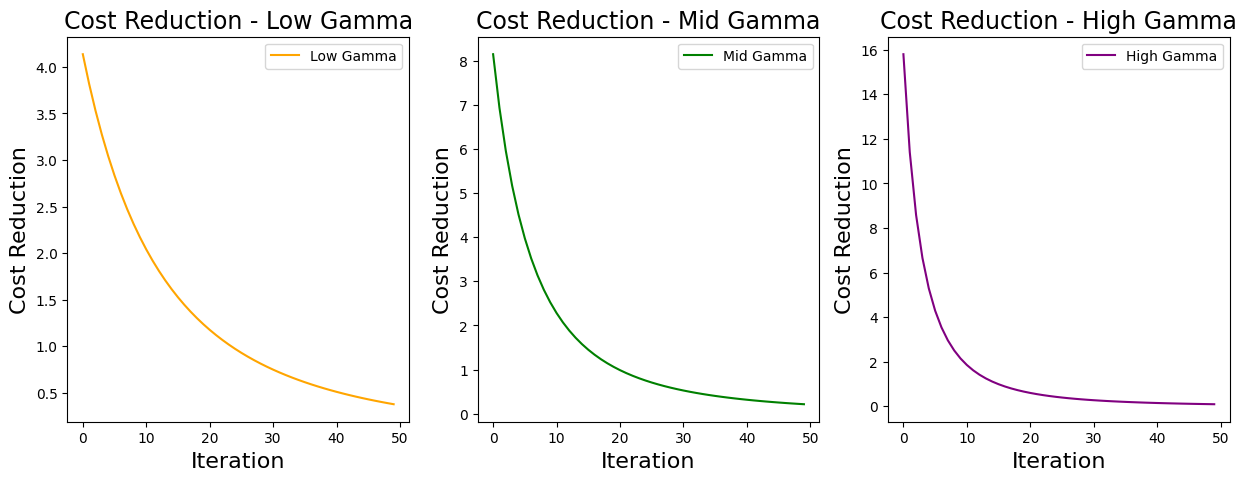

In [64]:
## TASK-7 : Plot reduction in cost for each iteration

def gradient_descent(derivative_func, initial_guess, multiplier=0.02, precision=0.001, max_iter=300):
    new_x = initial_guess
    x_list = [new_x]
    slope_list = [derivative_func(new_x)]
    cost_reduction_list = []

    for n in range(max_iter):
        previous_x = new_x
        gradient = derivative_func(previous_x)
        new_x = previous_x - multiplier * gradient

        step_size = abs(new_x - previous_x)
        x_list.append(new_x)
        slope_list.append(derivative_func(new_x))

        cost_reduction = abs(derivative_func(new_x) - derivative_func(previous_x))
        cost_reduction_list.append(cost_reduction)

        if step_size < precision:
            break

    return new_x, x_list, slope_list, cost_reduction_list

# Re-run gradient descent for different learning rates
local_min_low_gamma, list_x_low_gamma, deriv_list_low_gamma, cost_reduction_low_gamma = gradient_descent(
    derivative_func=dg, initial_guess=3, multiplier=0.0005, precision=0.0001, max_iter=n)

local_min_mid_gamma, list_x_mid_gamma, deriv_list_mid_gamma, cost_reduction_mid_gamma = gradient_descent(
    derivative_func=dg, initial_guess=3, multiplier=0.001, precision=0.0001, max_iter=n)

local_min_high_gamma, list_x_high_gamma, deriv_list_high_gamma, cost_reduction_high_gamma = gradient_descent(
    derivative_func=dg, initial_guess=3, multiplier=0.002, precision=0.0001, max_iter=n)

# Plot the reduction in cost for each iteration
plt.figure(figsize=[15, 5])

# 1 Chart: Low Gamma
plt.subplot(1, 3, 1)

plt.title('Cost Reduction - Low Gamma', fontsize=17)
plt.xlabel('Iteration', fontsize=16)
plt.ylabel('Cost Reduction', fontsize=16)

plt.plot(cost_reduction_low_gamma, label='Low Gamma', color='orange')
plt.legend()

# 2 Chart: Mid Gamma
plt.subplot(1, 3, 2)

plt.title('Cost Reduction - Mid Gamma', fontsize=17)
plt.xlabel('Iteration', fontsize=16)
plt.ylabel('Cost Reduction', fontsize=16)

plt.plot(cost_reduction_mid_gamma, label='Mid Gamma', color='green')
plt.legend()

# 3 Chart: High Gamma
plt.subplot(1, 3, 3)

plt.title('Cost Reduction - High Gamma', fontsize=17)
plt.xlabel('Iteration', fontsize=16)
plt.ylabel('Cost Reduction', fontsize=16)

plt.plot(cost_reduction_high_gamma, label='High Gamma', color='purple')
plt.legend()

plt.show()


# Example 4 - Data Viz with 3D Charts

## Minimise $$f(x, y) = \frac{1}{3^{-x^2 - y^2} + 1}$$

Minimise $$f(x, y) = \frac{1}{r + 1}$$ where $r$ is $3^{-x^2 - y^2}$

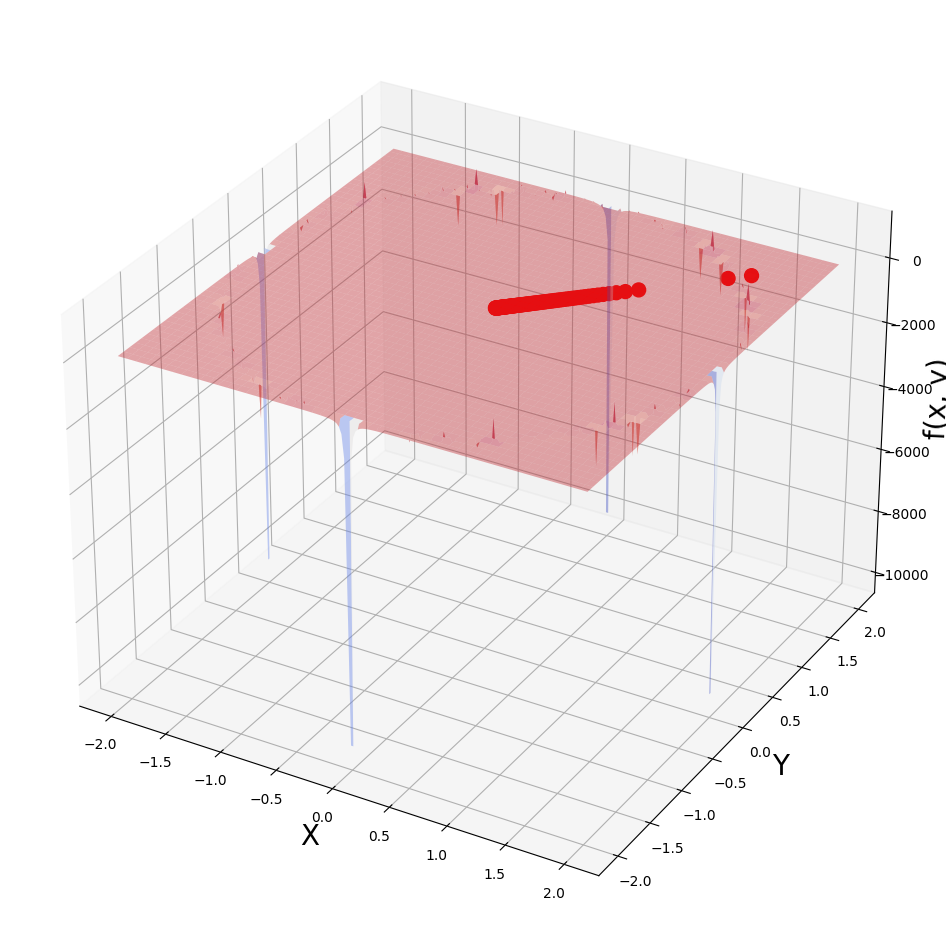

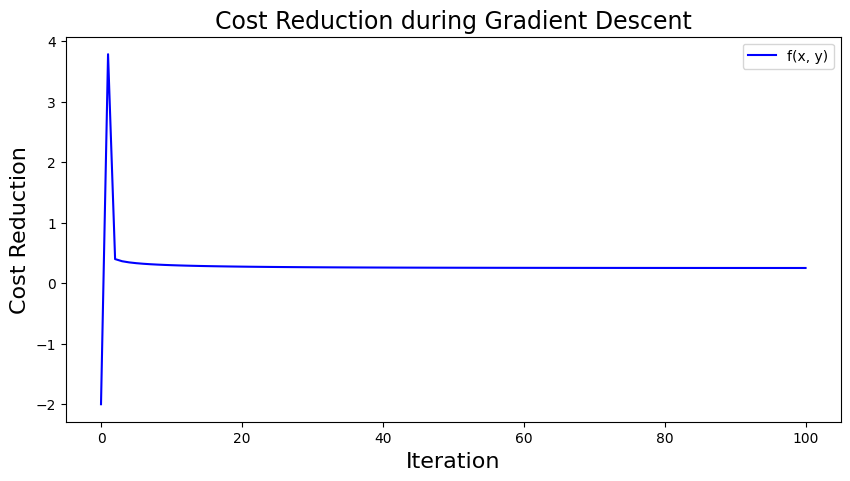

In [65]:
## TASK-8 : Code the same things as they were done for the first two examples

import matplotlib.pyplot as plt
import numpy as np
from mpl_toolkits.mplot3d.axes3d import Axes3D
from matplotlib import cm

# Define the new function f(x, y) and its derivative df(x, y)
def f(x, y):
    return 1 / (3 - x**2 - y**2 + 1)

def df(x, y):
    r = 3 - x**2 - y**2
    return (2 * x) / (r**2), (2 * y) / (r**2)

# Gradient Descent function
def gradient_descent_2d(derivative_func, initial_guess, multiplier=0.02, precision=0.001, max_iter=300):
    new_x, new_y = initial_guess
    x_list = [new_x]
    y_list = [new_y]

    for n in range(max_iter):
        previous_x, previous_y = new_x, new_y
        gradient_x, gradient_y = derivative_func(previous_x, previous_y)
        new_x = previous_x - multiplier * gradient_x
        new_y = previous_y - multiplier * gradient_y

        step_size = np.sqrt((new_x - previous_x)**2 + (new_y - previous_y)**2)
        x_list.append(new_x)
        y_list.append(new_y)

        if step_size < precision:
            break

    return (new_x, new_y), x_list, y_list

# Run gradient descent for the new function
initial_guess = (1.5, 1.5)
local_min, list_x, list_y = gradient_descent_2d(df, initial_guess, multiplier=0.1, precision=0.0001, max_iter=100)

# Visualize the process
# 1. Plot the function and the path taken during gradient descent
x_5 = np.linspace(start=-2, stop=2, num=200)
y_5 = np.linspace(start=-2, stop=2, num=200)
x_5, y_5 = np.meshgrid(x_5, y_5)

fig = plt.figure(figsize=(16, 12))
ax = fig.add_subplot(111, projection='3d')

ax.set_xlabel('X', fontsize=20)
ax.set_ylabel('Y', fontsize=20)
ax.set_zlabel('f(x, y)', fontsize=20)

ax.plot_surface(x_5, y_5, f(x_5, y_5), cmap=cm.coolwarm, alpha=0.4)
ax.scatter(list_x, list_y, [f(x, y) for x, y in zip(list_x, list_y)], color='red', s=100, alpha=1)

plt.show()

# 2. Plot the reduction in cost for each iteration
cost_reduction_list = [1 / (3 - x**2 - y**2 + 1) for x, y in zip(list_x, list_y)]

plt.figure(figsize=(10, 5))
plt.title('Cost Reduction during Gradient Descent', fontsize=17)
plt.xlabel('Iteration', fontsize=16)
plt.ylabel('Cost Reduction', fontsize=16)

plt.plot(cost_reduction_list, label='f(x, y)', color='blue')
plt.legend()
plt.show()


In [66]:
# Make our x and y data
x_4 = np.linspace(start=-2, stop=2, num=200)
y_4 = np.linspace(start=-2, stop=2, num=200)

print('Shape of X array', x_4.shape)

x_4, y_4 = np.meshgrid(x_4, y_4)
print('Array after meshgrid: ', x_4.shape)

Shape of X array (200,)
Array after meshgrid:  (200, 200)


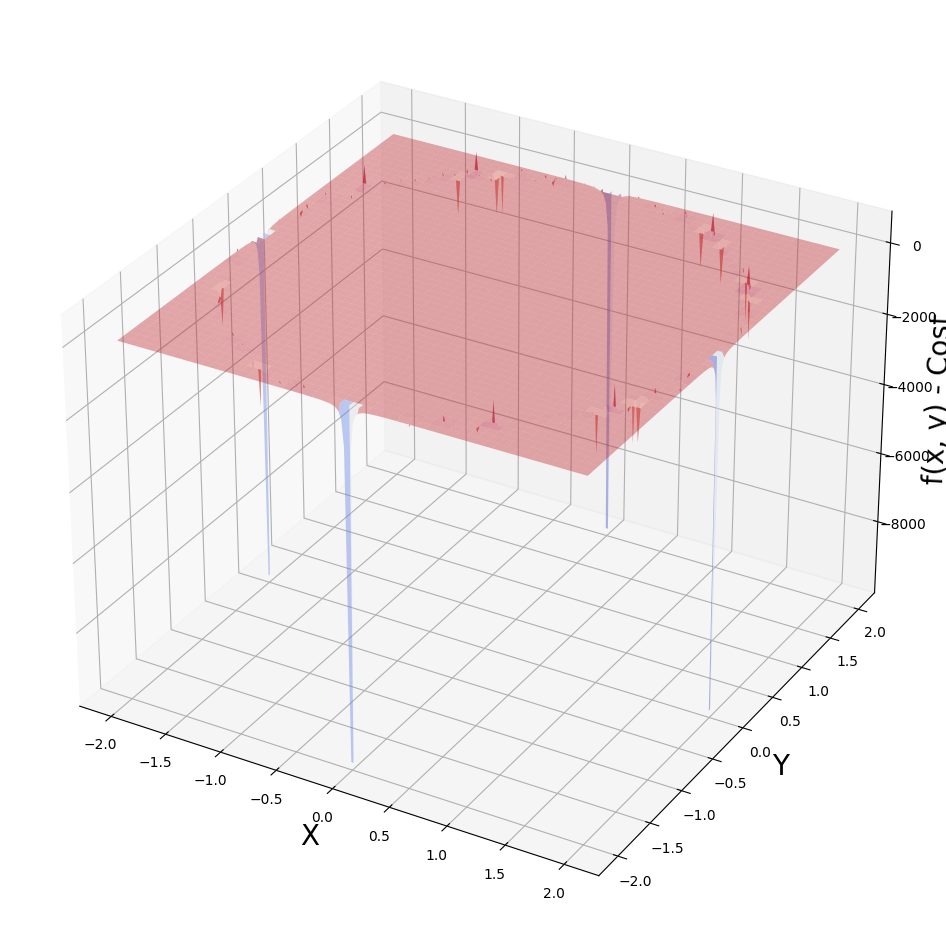

In [67]:
# Generating 3D Plot
fig = plt.figure(figsize=(16, 12))
ax = fig.add_subplot(111, projection='3d')

ax.set_xlabel('X', fontsize=20)
ax.set_ylabel('Y', fontsize=20)
ax.set_zlabel('f(x, y) - Cost', fontsize=20)

ax.plot_surface(x_4, y_4, f(x_4, y_4), cmap=cm.coolwarm, alpha=0.4)

plt.show()

##########################
##########################

## TASK-9 : Complete the lines of text wherever marked as [REQUIRED] in this cell.

##########################
##########################

## Partial Derivatives & Symbolic Computation

## $$\frac{\partial f}{\partial x} = ## [REQUIRED]

## $$\frac{\partial f}{\partial y} = ## [REQUIRED]

In [68]:
a, b = symbols('x, y')
print('Our cost function f(x, y) is: ', f(a, b))
print('Partial derivative wrt x is: ', diff(f(a, b), b))
print('Value of f(x,y) at x=1.8 y=1.0 is: ',
      f(a, b).evalf(subs={a:1.8, b:1.0})) # Python Dictionary
print('Value of partial derivative wrt x: ', diff(f(a, b), a).evalf(subs={a:1.8, b:1.0}))

Our cost function f(x, y) is:  1/(-x**2 - y**2 + 4)
Partial derivative wrt x is:  2*y/(-x**2 - y**2 + 4)**2
Value of f(x,y) at x=1.8 y=1.0 is:  -4.16666666666666
Value of partial derivative wrt x:  62.4999999999999


## Batch Gradient Descent with SymPy

In [69]:
# Setup
multiplier = 0.1
max_iter = 500
params = np.array([1.8, 1.0]) # initial guess

for n in range(max_iter):
    gradient_x = diff(f(a, b), a).evalf(subs={a:params[0], b:params[1]})
    gradient_y = diff(f(a, b), b).evalf(subs={a:params[0], b:params[1]})
    gradients = np.array([gradient_x, gradient_y])
    params = params - multiplier * gradients

# Results
print('Values in gradient array', gradients)
print('Minimum occurs at x value of: ', params[0])
print('Minimum occurs at y value of: ', params[1])
print('The cost is: ', f(params[0], params[1]))

Values in gradient array [0.0774079397932183 0.0430044109962325]
Minimum occurs at x value of:  0.508314391458292
Minimum occurs at y value of:  0.282396884143496
The cost is:  0.273084630336428


In [70]:
##########################
##########################

## TASK-10 : Complete the lines of code wherever marked as [REQUIRED] in this cell.

##########################
##########################

from sympy import symbols, diff

# Define the symbolic variables
x, y = symbols('x y')

# Define the cost function f(x, y)
def f(x, y):
    return 1 / (3 - x**2 - y**2 + 1)

# Calculate the partial derivatives with respect to x and y
df_dx = diff(f(x, y), x)
df_dy = diff(f(x, y), y)

# Define the partial derivative functions
def fpx(x, y):
    return df_dx.evalf(subs={x: x, y: y})

def fpy(x, y):
    return df_dy.evalf(subs={x: x, y: y})


In [71]:
# Setup
multiplier = 0.1
max_iter = 500
params = np.array([1.8, 1.0]) # initial guess

for n in range(max_iter):
    gradient_x = fpx(params[0], params[1])
    gradient_y = fpy(params[0], params[1])
    gradients = np.array([gradient_x, gradient_y])
    params = params - multiplier * gradients

# Results
print('Values in gradient array', gradients)
print('Minimum occurs at x value of: ', params[0])
print('Minimum occurs at y value of: ', params[1])
print('The cost is: ', f(params[0], params[1]))

Values in gradient array [0.125*x/(-0.25*x**2 - 0.25*y**2 + 1)**2
 0.125*y/(-0.25*x**2 - 0.25*y**2 + 1)**2]
Minimum occurs at x value of:  -6.25000000000006*x/(-0.25*x**2 - 0.25*y**2 + 1)**2 + 1.8
Minimum occurs at y value of:  -6.25000000000006*y/(-0.25*x**2 - 0.25*y**2 + 1)**2 + 1.0
The cost is:  1/(-39.0625000000007*(-x/(-0.25*x**2 - 0.25*y**2 + 1)**2 + 0.287999999999997)**2 - 39.0625000000007*(-y/(-0.25*x**2 - 0.25*y**2 + 1)**2 + 0.159999999999999)**2 + 4)


## Graphing 3D Gradient Descent

In [72]:
# Setup
multiplier = 0.1
max_iter = 200
params = np.array([1.8, 1.0]) # initial guess
values_array = params.reshape(1, 2)
print(values_array.shape)

for n in range(max_iter):
    gradient_x = fpx(params[0], params[1])
    gradient_y = fpy(params[0], params[1])
    gradients = np.array([gradient_x, gradient_y])
    params = params - multiplier * gradients
    #values_array = np.append(values_array, params.reshape(1, 2), axis=0)
    values_array = np.concatenate((values_array, params.reshape(1, 2)), axis=0)


# Results
print('Values in gradient array', gradients)
print('Minimum occurs at x value of: ', params[0])
print('Minimum occurs at y value of: ', params[1])
print('The cost is: ', f(params[0], params[1]))

(1, 2)
Values in gradient array [0.125*x/(-0.25*x**2 - 0.25*y**2 + 1)**2
 0.125*y/(-0.25*x**2 - 0.25*y**2 + 1)**2]
Minimum occurs at x value of:  -2.5*x/(-0.25*x**2 - 0.25*y**2 + 1)**2 + 1.8
Minimum occurs at y value of:  -2.5*y/(-0.25*x**2 - 0.25*y**2 + 1)**2 + 1.0
The cost is:  1/(-6.25000000000001*(-x/(-0.25*x**2 - 0.25*y**2 + 1)**2 + 0.72)**2 - 6.25000000000001*(-y/(-0.25*x**2 - 0.25*y**2 + 1)**2 + 0.4)**2 + 4)


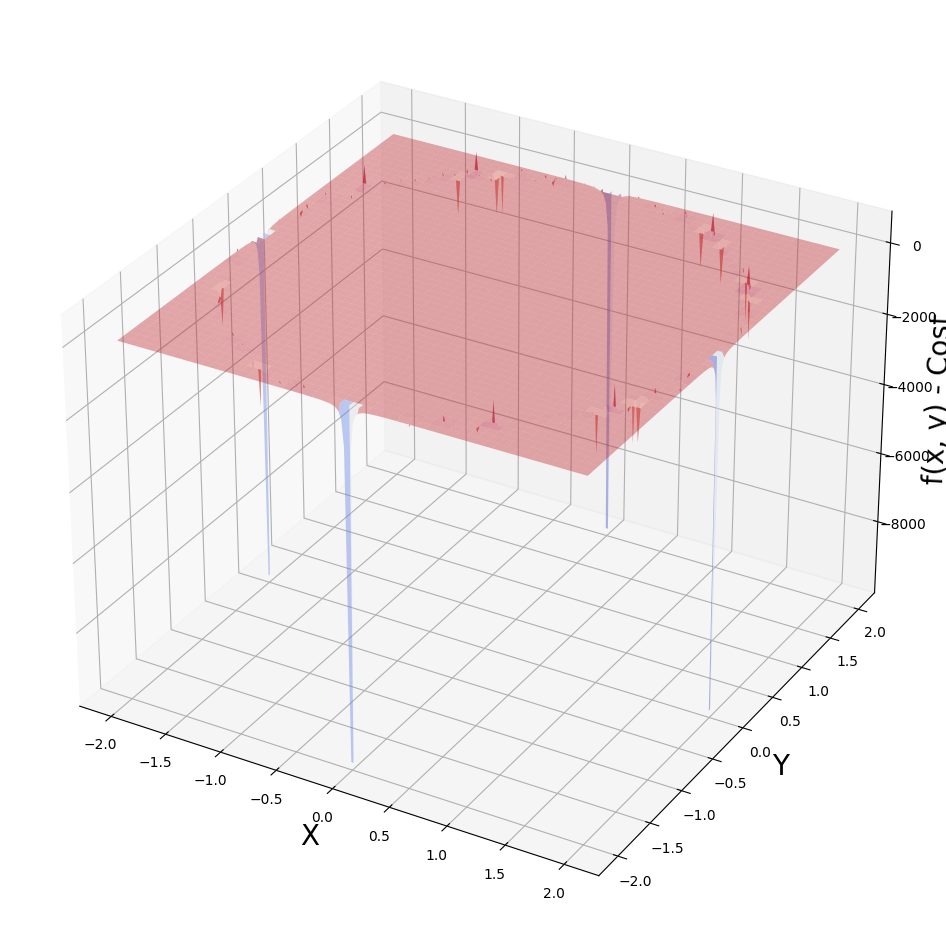

In [73]:
# Generating 3D Plot
fig = plt.figure(figsize=[16, 12])
ax = fig.add_subplot(111, projection='3d')

ax.set_xlabel('X', fontsize=20)
ax.set_ylabel('Y', fontsize=20)
ax.set_zlabel('f(x, y) - Cost', fontsize=20)

ax.plot_surface(x_4, y_4, f(x_4, y_4), cmap=cm.coolwarm, alpha=0.4)
#ax.scatter(values_array[:, 0], values_array[:, 1],f(values_array[:, 0], values_array[:, 1]), s=50, color='red')

plt.show()

## For Reference, practice and play with the code below

# Example 5 - Working with Data & a Real Cost Function

## Mean Squared Error: a cost function for regression problems

### $$RSS = \sum_{i=1}^{n} \big( y^{(i)} - h_\theta x^{(i)} \big)^2 $$
### $$MSE = \frac{1}{n} \sum_{i=1}^{n} \big( y^{(i)} - h_\theta x^{(i)} \big)^2 $$
### $$MSE = \frac{1}{n} \sum_{i=1}^{n} \big( y - \hat{y} \big)^2 $$

In [74]:
# Make sample data
x_5 = np.array([[0.1, 1.2, 2.4, 3.2, 4.1, 5.7, 6.5]]).transpose()
y_5 = np.array([1.7, 2.4, 3.5, 3.0, 6.1, 9.4, 8.2]).reshape(7, 1)

print('Shape of x_5 array:', x_5.shape)
print('Shape of y_5 array:', y_5.shape)

Shape of x_5 array: (7, 1)
Shape of y_5 array: (7, 1)


In [75]:
# Quick linear regressino
regr = LinearRegression()
regr.fit(x_5, y_5)
print('Theta 0:', regr.intercept_[0])
print('Theta 1:', regr.coef_[0][0])

Theta 0: 0.8475351486029545
Theta 1: 1.2227264637835913


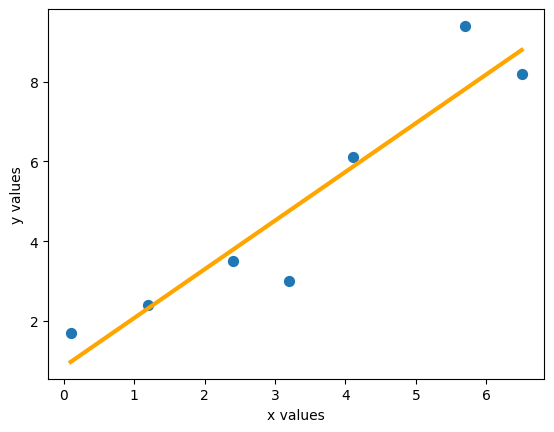

In [76]:
plt.scatter(x_5, y_5, s=50)
plt.plot(x_5, regr.predict(x_5), color='orange', linewidth=3)
plt.xlabel('x values')
plt.ylabel('y values')
plt.show()

In [77]:
# y_hat = theta0 + theta1*x
y_hat = 0.847535148603 + 1.22272646378*x_5
print('Est values y_hat are: \n', y_hat)
print('In comparison, the actual y values are \n', y_5)

Est values y_hat are: 
 [[0.96980779]
 [2.31480691]
 [3.78207866]
 [4.76025983]
 [5.86071365]
 [7.81707599]
 [8.79525716]]
In comparison, the actual y values are 
 [[1.7]
 [2.4]
 [3.5]
 [3. ]
 [6.1]
 [9.4]
 [8.2]]


In [78]:
# Challenge: Write a python function mse(y, y_hat) returns the MSE? Call the mse(y, y_hat)
# function and print out the MSE for the y_hat calculated above.

def mse(y, y_hat):
    #mse_calc = 1/7 * sum((y - y_hat)**2)
    #mse_calc = (1/y.size) * sum((y - y_hat)**2)
    mse_calc = np.average((y - y_hat)**2, axis=0)
    return mse_calc

In [79]:
print('Manually calculated MSE is:', mse(y_5, y_hat))
print('MSE regression using manual calc is', mean_squared_error(y_5, y_hat))
print('MSE regression is', mean_squared_error(y_5, regr.predict(x_5)))


Manually calculated MSE is: [0.94796558]
MSE regression using manual calc is 0.947965575979458
MSE regression is 0.9479655759794577


## 3D Plot for the MSE Cost Function

### Make data for thetas

In [80]:
nr_thetas = 200
th_0 = np.linspace(start=-1, stop=3, num=nr_thetas)
th_1 = np.linspace(start=-1, stop=3, num=nr_thetas)
plot_t0, plot_t1 = np.meshgrid(th_0, th_1)


### Calc MSE using nested for loops

In [81]:
plot_cost = np.zeros((nr_thetas, nr_thetas))

for i in range(nr_thetas):
    for j in range(nr_thetas):
        #print(plot_t0[j][i])
        y_hat = plot_t0[i][j] + plot_t1[i][j]*x_5
        plot_cost[i][j] = mse(y_5, y_hat)

print('Shape of plot_t0', plot_t0.shape)
print('Shape of plot_t1', plot_t1.shape)
print('Shape of plot_cost', plot_cost.shape)

Shape of plot_t0 (200, 200)
Shape of plot_t1 (200, 200)
Shape of plot_cost (200, 200)


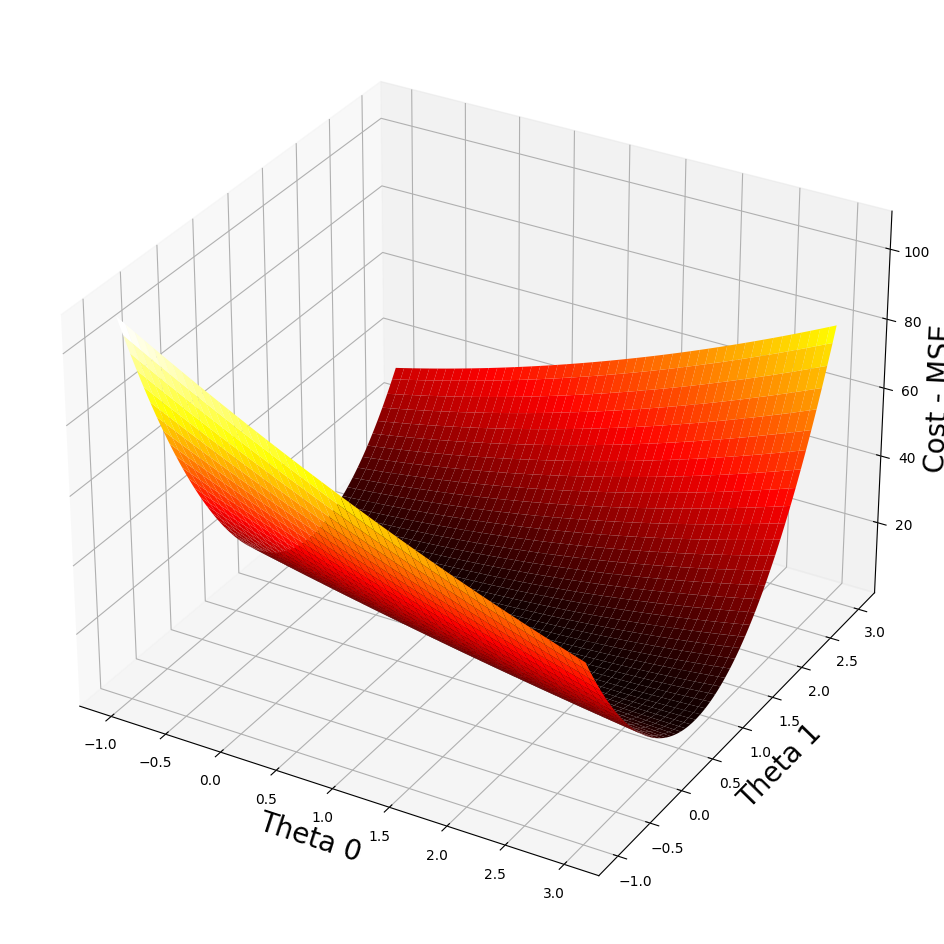

In [82]:
# Plotting MSE
fig = plt.figure(figsize=[16, 12])
ax = fig.add_subplot(111, projection='3d')

ax.set_xlabel('Theta 0', fontsize=20)
ax.set_ylabel('Theta 1', fontsize=20)
ax.set_zlabel('Cost - MSE', fontsize=20)

ax.plot_surface(plot_t0, plot_t1, plot_cost, cmap=cm.hot)
plt.show()

In [83]:
print('Min value of plot_cost', plot_cost.min())
ij_min = np.unravel_index(plot_cost.argmin(), plot_cost.shape)
print('Min occurs at (i,j):', ij_min)
print('Min MSE for Theta 0 at plot_t0[111][91]', plot_t0[ij_min[0]][ij_min[1]])
print('Min MSE for Theta 1 at plot_t1[111][91]', plot_t1[ij_min[0]][ij_min[1]])

Min value of plot_cost 0.9483826526747164
Min occurs at (i,j): (111, 91)
Min MSE for Theta 0 at plot_t0[111][91] 0.829145728643216
Min MSE for Theta 1 at plot_t1[111][91] 1.2311557788944723


## Partial Derivatives of MSE w.r.t. $\theta_0$ and $\theta_1$

## $$\frac{\partial MSE}{\partial \theta_0} = - \frac{2}{n} \sum_{i=1}^{n} \big( y^{(i)} - \theta_0 - \theta_1 x^{(i)} \big)$$

## $$\frac{\partial MSE}{\partial \theta_1} = - \frac{2}{n} \sum_{i=1}^{n} \big( y^{(i)} - \theta_0 - \theta_1 x^{(i)} \big) \big( x^{(i)} \big)$$

## MSE & Gradient Descent

In [84]:
# x values, y values, array of theta parameters (theta0 at index 0 and theta1 at index 1)
def grad(x, y, thetas):
    n = y.size

    # Challenge: Create theta0_slope and theta1_slope to hold slope values from partial derivs
    theta0_slope = (-2/n) * sum(y - thetas[0] - thetas[1]*x)
    theta1_slope = (-2/n) * sum((y - thetas[0] - thetas[1]*x)*x)

    #return np.array([theta0_slope[0], theta1_slope[0]])
    #return np.append(arr=theta0_slope, values=theta1_slope)
    return np.concatenate((theta0_slope, theta1_slope), axis=0)

In [85]:
multiplier = 0.01
thetas = np.array([2.9, 2.9])

# Collect data points for scatter plot
plot_vals = thetas.reshape(1, 2)
mse_vals = mse(y_5, thetas[0] + thetas[1]*x_5)

for i in range(1000):
    thetas = thetas - multiplier * grad(x_5, y_5, thetas)

    # Append the new values to our numpy arrays
    plot_vals = np.concatenate((plot_vals, thetas.reshape(1, 2)), axis=0)
    mse_vals = np.append(arr=mse_vals, values=mse(y_5, thetas[0] + thetas[1]*x_5))

# Results
print('Min occurs at Theta 0:', thetas[0])
print('Min occurs at Theta 1:', thetas[1])
print('MSE is:', mse(y_5, thetas[0] + thetas[1]*x_5))

Min occurs at Theta 0: 0.8532230461743415
Min occurs at Theta 1: 1.2214935332607393
MSE is: [0.94797511]


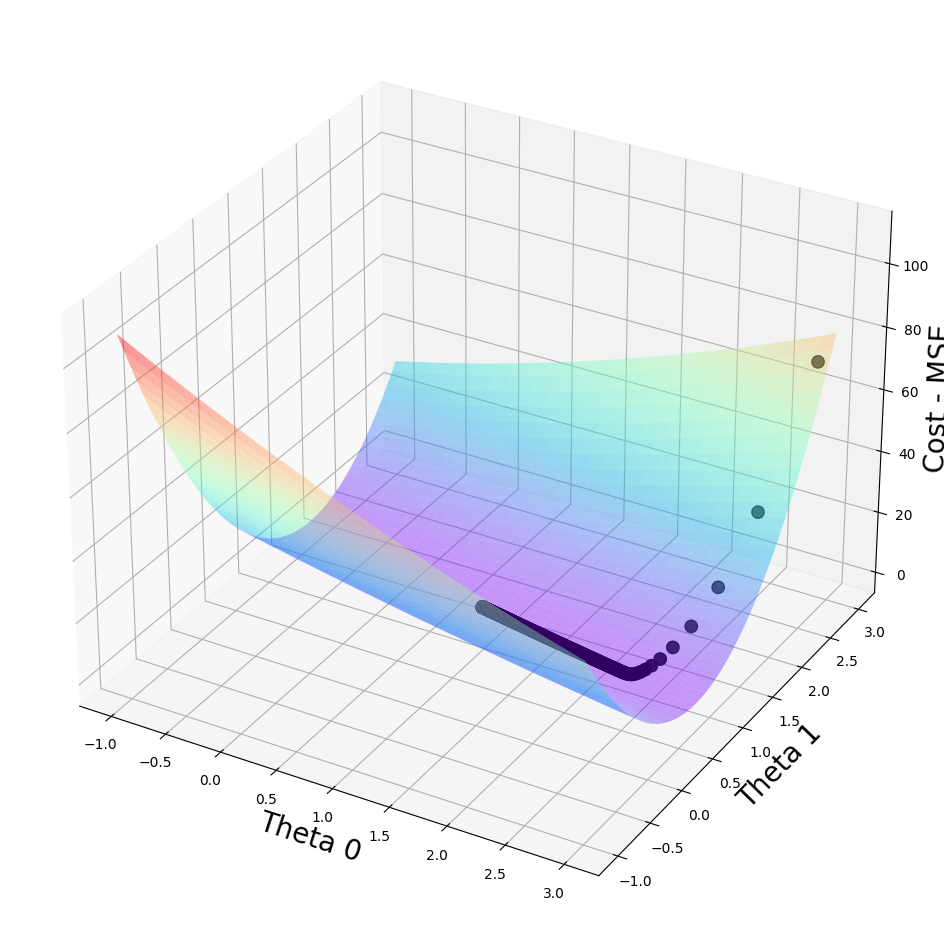

In [86]:
# Plotting MSE
fig = plt.figure(figsize=[16, 12])
ax = fig.add_subplot(111, projection='3d')

ax.set_xlabel('Theta 0', fontsize=20)
ax.set_ylabel('Theta 1', fontsize=20)
ax.set_zlabel('Cost - MSE', fontsize=20)

ax.scatter(plot_vals[:, 0], plot_vals[:, 1], mse_vals, s=80, color='black')
ax.plot_surface(plot_t0, plot_t1, plot_cost, cmap=cm.rainbow, alpha=0.4)
plt.show()